In [ ]:
!pip cache purge
!pip install --user numpy==1.26.4

In [2]:
import numpy as np

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\miafairush\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\miafairush\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [4]:
df = pd.read_csv("Database Tech Test.csv")
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Disney Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,8-Apr-15,4-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Disney Imposed a New Usage Cap of 300GB that p...,7-May-15,5-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Disney not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [5]:
df

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Disney Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,8-Apr-15,4-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Disney Imposed a New Usage Cap of 300GB that p...,7-May-15,5-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Disney not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No
...,...,...,...,...,...,...,...,...,...,...,...
2219,213550,Service Availability,2-Apr-15,4-Feb-15,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No
2220,318775,Disney Monthly Billing for Returned Modem,2-Jun-15,6-Feb-15,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No
2221,331188,complaint about Disney,9-Jun-15,6-Sep-15,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Solved,No
2222,360489,Extremely unsatisfied Disney customer,23-06-15,23-Jun-15,11:13:30 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticket #                     2224 non-null   object
 1   Customer Complaint           2224 non-null   object
 2   Date                         2224 non-null   object
 3   Date_month_year              2224 non-null   object
 4   Time                         2224 non-null   object
 5   Received Via                 2224 non-null   object
 6   City                         2224 non-null   object
 7   State                        2224 non-null   object
 8   Zip code                     2224 non-null   int64 
 9   Status                       2224 non-null   object
 10  Filing on Behalf of Someone  2224 non-null   object
dtypes: int64(1), object(10)
memory usage: 191.2+ KB


In [7]:
df = df[['Customer Complaint', 'Received Via', 'State', 'Status']]
df

,Customer Complaint,Received Via,State,Status
0,Disney Cable Internet Speeds,Customer Care Call,Maryland,Closed
1,Payment disappear - service got disconnected,Internet,Georgia,Closed
2,Speed and Service,Internet,Georgia,Closed
3,Disney Imposed a New Usage Cap of 300GB that p...,Internet,Georgia,Open
4,Disney not working and no service to boot,Internet,Georgia,Solved
...,...,...,...,...
2219,Service Availability,Customer Care Call,Florida,Closed
2220,Disney Monthly Billing for Returned Modem,Customer Care Call,Michigan,Solved
2221,complaint about Disney,Internet,Michigan,Solved
2222,Extremely unsatisfied Disney customer,Customer Care Call,Michigan,Solved


# Sentimen Analysis

## Cleaning Text

In [8]:
df.isnull().sum()

Customer Complaint    0
Received Via          0
State                 0
Status                0
dtype: int64

In [9]:
import string
import re
def clean_text(text):
    text = re.sub(r'#\w+', '', text)  # Menghapus hashtag
    text = re.sub(r'[^A-Za-z0-9 ]', '', text)  # Hanya menyisakan huruf, angka, dan spasi
    text = re.sub(r'\s+', ' ', text).strip()  # Menghapus spasi berlebih
    return text.lower()  # Mengonversi ke huruf kecil
df['Customer Complaint'] = df['Customer Complaint'].apply(clean_text)
df

C:\Users\miafairush\AppData\Local\Temp\ipykernel_13656\3327565308.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Customer Complaint'] = df['Customer Complaint'].apply(clean_text)


,Customer Complaint,Received Via,State,Status
0,disney cable internet speeds,Customer Care Call,Maryland,Closed
1,payment disappear service got disconnected,Internet,Georgia,Closed
2,speed and service,Internet,Georgia,Closed
3,disney imposed a new usage cap of 300gb that p...,Internet,Georgia,Open
4,disney not working and no service to boot,Internet,Georgia,Solved
...,...,...,...,...
2219,service availability,Customer Care Call,Florida,Closed
2220,disney monthly billing for returned modem,Customer Care Call,Michigan,Solved
2221,complaint about disney,Internet,Michigan,Solved
2222,extremely unsatisfied disney customer,Customer Care Call,Michigan,Solved


## Tokenization

In [10]:
def tokenize_text(text):
    tokenized_text = text.split()
    return tokenized_text
df['tokens'] = df['Customer Complaint'].apply(lambda x: tokenize_text(x))
df.head()

C:\Users\miafairush\AppData\Local\Temp\ipykernel_13656\318160441.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tokens'] = df['Customer Complaint'].apply(lambda x: tokenize_text(x))


,Customer Complaint,Received Via,State,Status,tokens
0,disney cable internet speeds,Customer Care Call,Maryland,Closed,"[disney, cable, internet, speeds]"
1,payment disappear service got disconnected,Internet,Georgia,Closed,"[payment, disappear, service, got, disconnected]"
2,speed and service,Internet,Georgia,Closed,"[speed, and, service]"
3,disney imposed a new usage cap of 300gb that p...,Internet,Georgia,Open,"[disney, imposed, a, new, usage, cap, of, 300g..."
4,disney not working and no service to boot,Internet,Georgia,Solved,"[disney, not, working, and, no, service, to, b..."


## Lemmatization and Removing Stopwords

In [11]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
def lemmatize_text(token_list):
    return " ".join([lemmatizer.lemmatize(token) for token in token_list if not token in set(all_stopwords)])

C:\Users\miafairush\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\miafairush\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\miafairush\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\miafairush\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [12]:
lemmatizer = nltk.stem.WordNetLemmatizer()
df['lemmatized_complaint'] = df['tokens'].apply(lambda x: lemmatize_text(x))
df.head()

C:\Users\miafairush\AppData\Local\Temp\ipykernel_13656\2923787169.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lemmatized_complaint'] = df['tokens'].apply(lambda x: lemmatize_text(x))


,Customer Complaint,Received Via,State,Status,tokens,lemmatized_complaint
0,disney cable internet speeds,Customer Care Call,Maryland,Closed,"[disney, cable, internet, speeds]",disney cable internet speed
1,payment disappear service got disconnected,Internet,Georgia,Closed,"[payment, disappear, service, got, disconnected]",payment disappear service got disconnected
2,speed and service,Internet,Georgia,Closed,"[speed, and, service]",speed service
3,disney imposed a new usage cap of 300gb that p...,Internet,Georgia,Open,"[disney, imposed, a, new, usage, cap, of, 300g...",disney imposed new usage cap 300gb punishes st...
4,disney not working and no service to boot,Internet,Georgia,Solved,"[disney, not, working, and, no, service, to, b...",disney not working service boot


## WordCloud

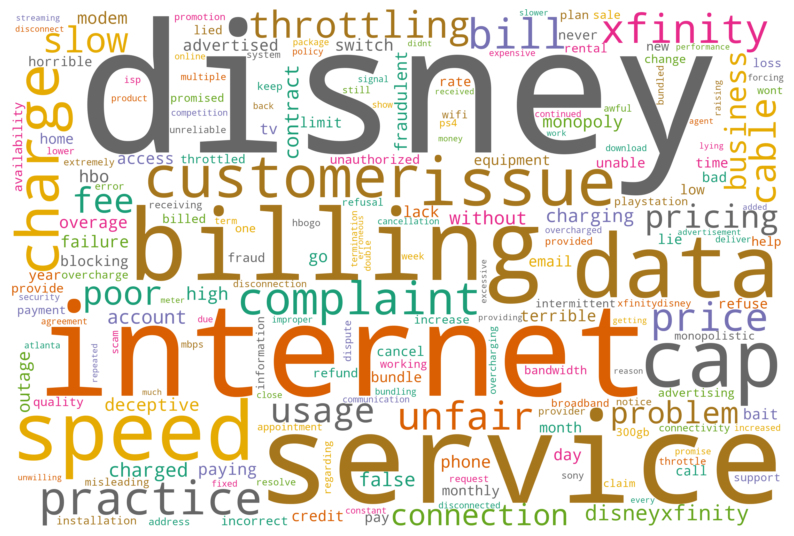

In [13]:
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

all_words = ' '.join([complaint for complaint in df['lemmatized_complaint']])

wordcloud = WordCloud(
    width=3000,
    height=2000,
    random_state=3,
    background_color='White',
    colormap='Dark2',
    collocations=False,
    stopwords=STOPWORDS
).generate(all_words)

plot_cloud(wordcloud)

## LDA Model

In [14]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

vectorizer = TfidfVectorizer(max_features=5000)  # Batasi fitur untuk efisiensi
X = vectorizer.fit_transform(df["lemmatized_complaint"])

num_topics = 3
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_model.fit(X)

LatentDirichletAllocation(n_components=3, random_state=42)

In [15]:
def display_topics(model, feature_names, num_words=10):
    for topic_idx, topic in enumerate(model.components_):
        words = [feature_names[i] for i in topic.argsort()[:-num_words - 1:-1]]
        print(f"Topic {topic_idx + 1}: {', '.join(words)}")

feature_names = vectorizer.get_feature_names_out()
display_topics(lda_model, feature_names)

Topic 1: data, cap, disney, charge, usage, fraudulent, overage, limit, switch, bundle
Topic 2: internet, speed, service, disney, xfinity, slow, disneyxfinity, not, fee, bill
Topic 3: disney, billing, service, issue, complaint, practice, customer, internet, throttling, unfair


## Topic Dominant & its Example

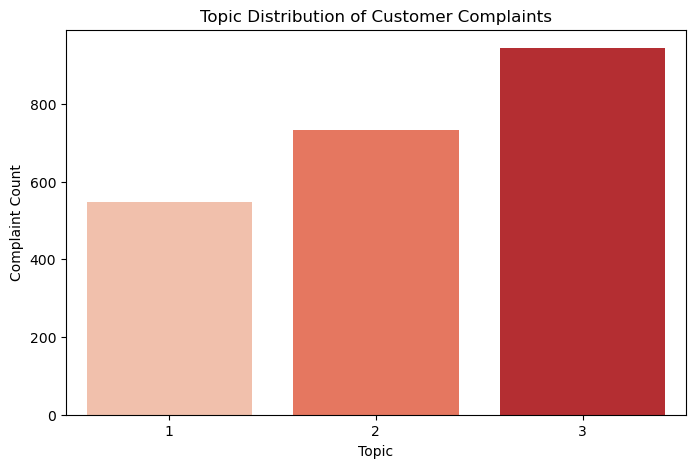

In [16]:
import seaborn as sns

# Mendapatkan distribusi topik per dokumen
topic_distribution = lda_model.transform(X)

# Menentukan topik dominan untuk setiap complaint
dominant_topic = np.argmax(topic_distribution, axis=1)

# Menghitung jumlah complaint per topik
topic_counts = pd.Series(dominant_topic).value_counts().sort_index()

# Visualisasi distribusi topik
plt.figure(figsize=(8,5))
sns.barplot(x=np.arange(1, len(topic_counts) + 1), y=topic_counts.values, palette="Reds")
plt.xlabel("Topic")
plt.ylabel("Complaint Count")
plt.title("Topic Distribution of Customer Complaints")
plt.show()

In [17]:
df['Dominant_Topic'] = dominant_topic

# contoh complaint untuk tiap topik
for topic_num in range(len(topic_counts)):
    contoh = df[df['Dominant_Topic'] == topic_num]['lemmatized_complaint'].iloc[0]
    print(f"🔹 Contoh Complaint untuk Topik {topic_num+1}:")
    print(contoh)

🔹 Contoh Complaint untuk Topik 1:
disney imposed new usage cap 300gb punishes streaming
🔹 Contoh Complaint untuk Topik 2:
speed service
🔹 Contoh Complaint untuk Topik 3:
disney cable internet speed


C:\Users\miafairush\AppData\Local\Temp\ipykernel_13656\2197202978.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Dominant_Topic'] = dominant_topic


## Sentimen per Topic

C:\Users\miafairush\AppData\Local\Temp\ipykernel_13656\2545512839.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sentiment'] = df['lemmatized_complaint'].apply(get_sentiment)


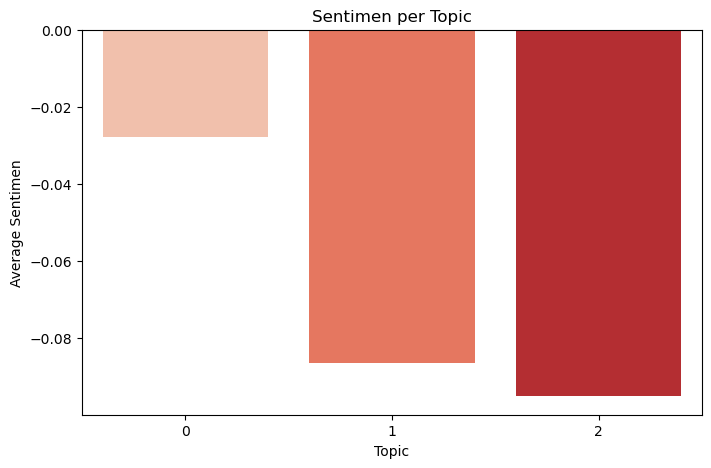

In [18]:
from textblob import TextBlob

# Fungsi untuk mendapatkan sentimen
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity  # Skala -1 (negatif) sampai +1 (positif)

# Tambahkan kolom sentimen
df['Sentiment'] = df['lemmatized_complaint'].apply(get_sentiment)

# Rata-rata sentimen per topik
sentiment_per_topic = df.groupby("Dominant_Topic")['Sentiment'].mean()

# Visualisasi
plt.figure(figsize=(8,5))
sns.barplot(x=sentiment_per_topic.index, y=sentiment_per_topic.values, palette="Reds")
plt.xlabel("Topic")
plt.ylabel("Average Sentimen")
plt.title("Sentimen per Topic")
plt.show()

# EDA

## State with the Most Complaints

In [19]:
!pip install folium geopy
import pandas as pd
import folium
from folium.plugins import MarkerCluster
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
import time

In [20]:
dfstate = df[['State']]
dfstate.head()

,State
0,Maryland
1,Georgia
2,Georgia
3,Georgia
4,Georgia


In [21]:
# mendapatkan Latitude & Longitude
geolocator = Nominatim(user_agent="complaint mapping")

def get_lat_lon(state):
    try:
        location = geolocator.geocode(f"{state}", timeout=10)
        if location:
            return location.latitude, location.longitude
        else:
            return None, None
    except GeocoderTimedOut:
        return None, None

# Tambah kolom Latitude & Longitude
dfstate[["Latitude", "Longitude"]] = dfstate.apply(lambda row: pd.Series(get_lat_lon(row["State"])), axis=1)

# kolom jumlah keluhan per lokasi
dfstate_grouped = dfstate.groupby(["State", "Latitude", "Longitude"]).size().reset_index(name="Complaint Count")

# Cek apakah ada data yang gagal di-geocode
dfstate_grouped.dropna(subset=["Latitude", "Longitude"], inplace=True)

# pusat peta berdasarkan rata-rata lokasi
lat_center = dfstate_grouped["Latitude"].mean()
lon_center = dfstate_grouped["Longitude"].mean()

# Buat peta
m = folium.Map(location=[lat_center, lon_center], zoom_start=6)

# Tambah marker untuk setiap lokasi
for _, row in dfstate_grouped.iterrows():
    folium.CircleMarker(
        location=[row["Latitude"], row["Longitude"]],
        radius=row["Complaint Count"]/15,
        color="red",
        fill=True,
        fill_color="red",
        fill_opacity=0.6,
        popup=f"{row['State']} - {row['Complaint Count']} Complaints",
    ).add_to(m)

# Simpan peta
m.save("customer_complaints_map.html")
m

C:\Users\miafairush\AppData\Local\Temp\ipykernel_13656\3979895419.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfstate[["Latitude", "Longitude"]] = dfstate.apply(lambda row: pd.Series(get_lat_lon(row["State"])), axis=1)
C:\Users\miafairush\AppData\Local\Temp\ipykernel_13656\3979895419.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfstate[["Latitude", "Longitude"]] = dfstate.apply(lambda row: pd.Series(get_lat_lon(row["State"])), axis=1)


## Received Via vs Complaint Status

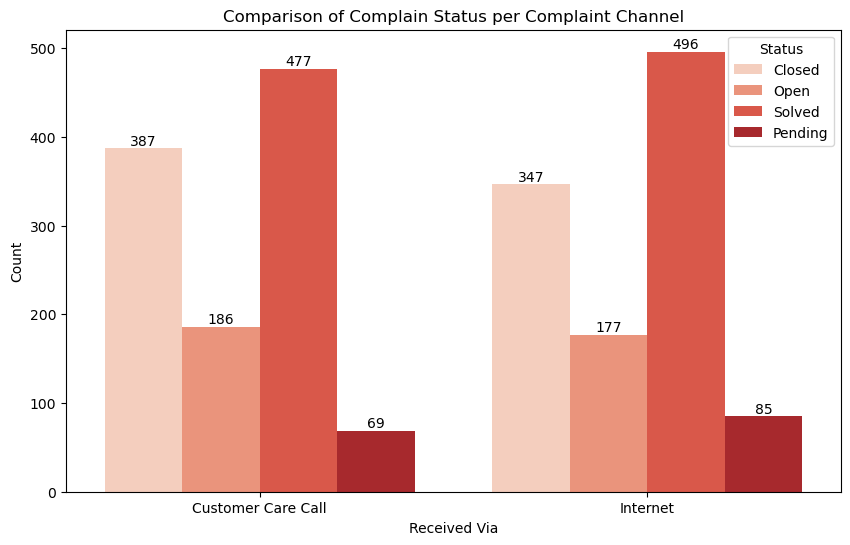

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
ax = sns.countplot(data=df, x="Received Via", hue="Status", palette="Reds")
                                        
plt.xticks(rotation=0)
plt.xlabel("Received Via")
plt.ylabel("Count")
plt.title("Comparison of Complain Status per Complaint Channel")

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black')
plt.show()